<a href="https://www.kaggle.com/code/kusumakar/gym-data-eda-and-predictions-98-accuracy?scriptVersionId=201274217" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


# Steps 

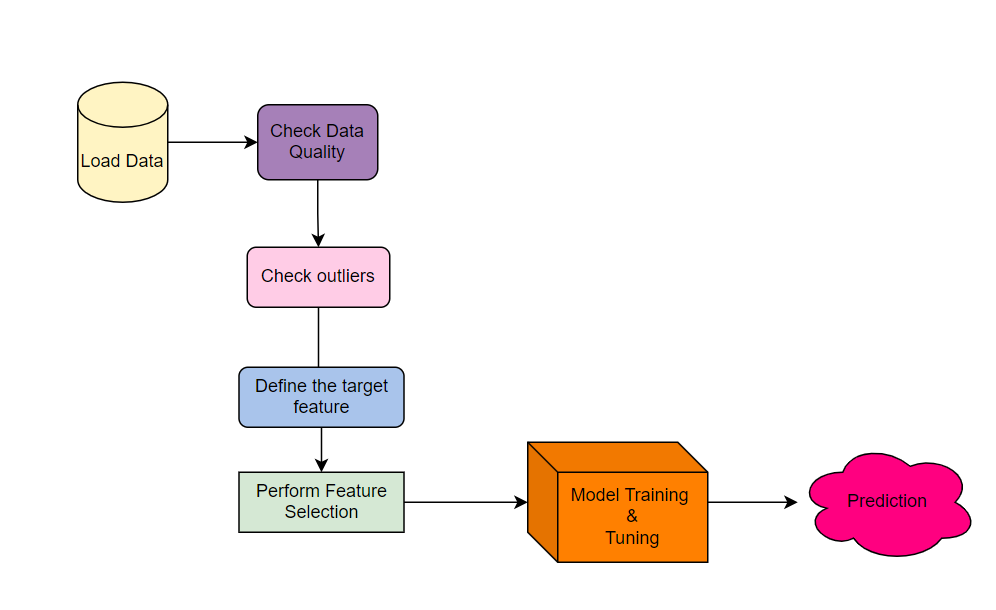

## Load the Data

In [2]:
df = pd.read_csv("/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Check for outliers

In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### There are no nulls in the dataset

## Check the Datatypes

In [5]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

### We have numerical as well as the String Columns in the dataset

## Check Outliers

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

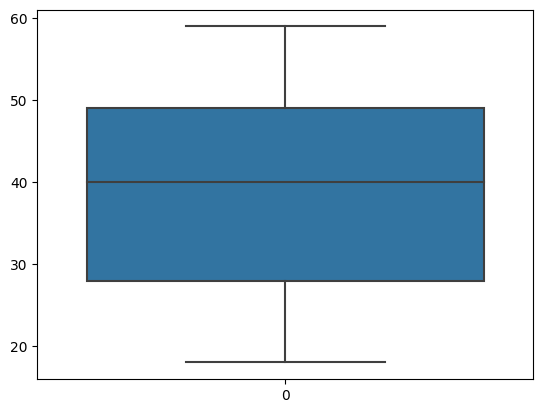

In [7]:
# Age Outliers
sns.boxplot(df['Age'])

### No outliers in Age

<Axes: >

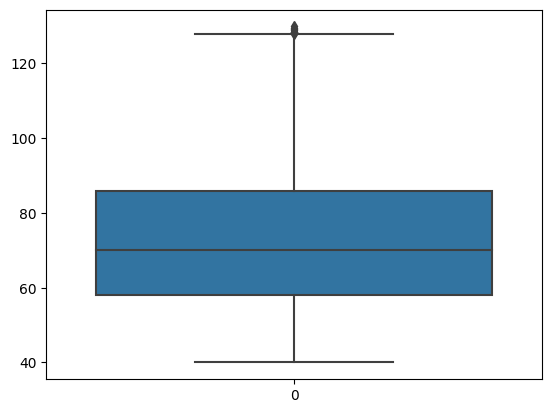

In [8]:
## Weight Outliers

sns.boxplot(df['Weight (kg)'])


In [9]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    df_cleaned = df[(df[column]>Q1-1.5*IQR)&(df[column]<Q3+1.5*IQR)]

    return df_cleaned

In [10]:
df=remove_outliers(df,'Weight (kg)')

Text(0.5, 1.0, 'HEIGHT OUTLIERS')

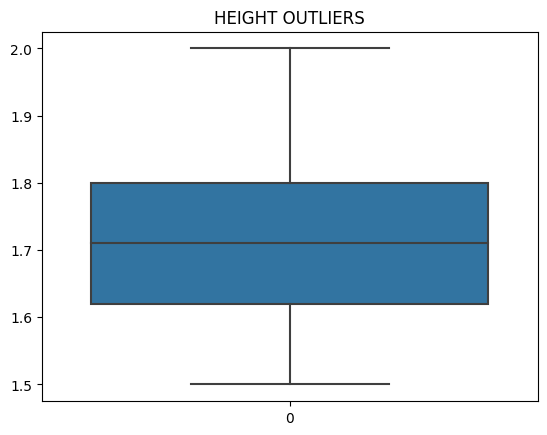

In [11]:
# Outliers in Height
sns.boxplot(df['Height (m)'])
plt.title("HEIGHT OUTLIERS")

#### Not outliers in Height

Text(0.5, 1.0, ' MAX BPM OUTLIERS')

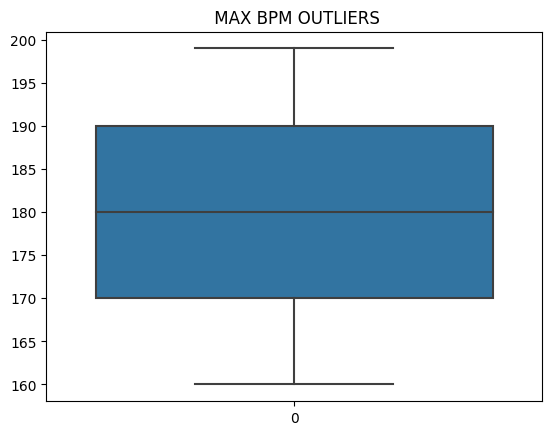

In [12]:
sns.boxplot(df['Max_BPM'])
plt.title(" MAX BPM OUTLIERS")

Text(0.5, 1.0, "'Avg BPM Outliers ")

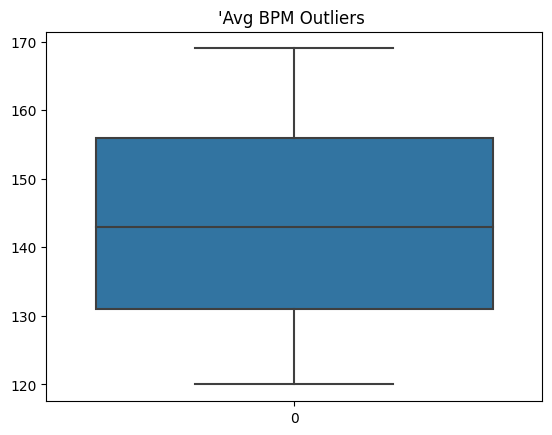

In [13]:
sns.boxplot(df['Avg_BPM'])
plt.title("'Avg BPM Outliers ")

Text(0.5, 1.0, 'RESTING BPM OUTLIERS')

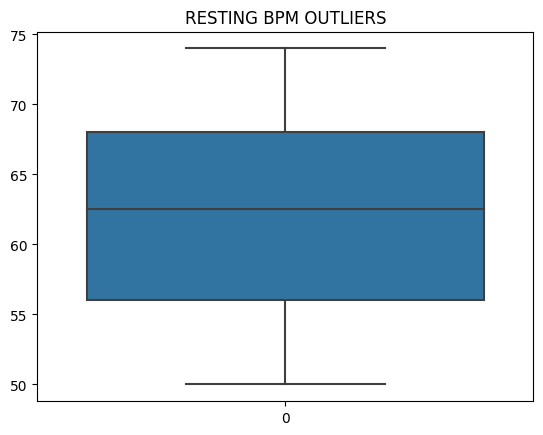

In [14]:
sns.boxplot(df['Resting_BPM'])
plt.title("RESTING BPM OUTLIERS")

Text(0.5, 1.0, ' SESSION DURATION OUTLIERS')

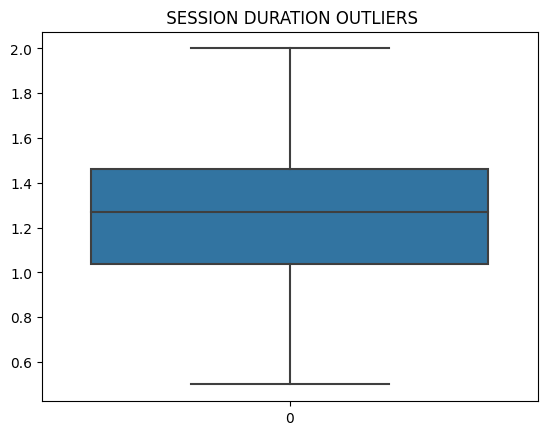

In [15]:
sns.boxplot(df['Session_Duration (hours)'])
plt.title(" SESSION DURATION OUTLIERS")

Text(0.5, 1.0, 'Calories Burned Outliers')

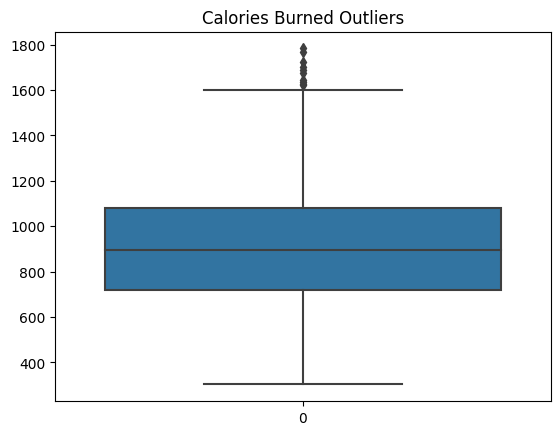

In [16]:
sns.boxplot(df['Calories_Burned'])
plt.title("Calories Burned Outliers")

In [17]:
df=remove_outliers(df,'Calories_Burned')

Text(0.5, 1.0, 'FAT % Outliers')

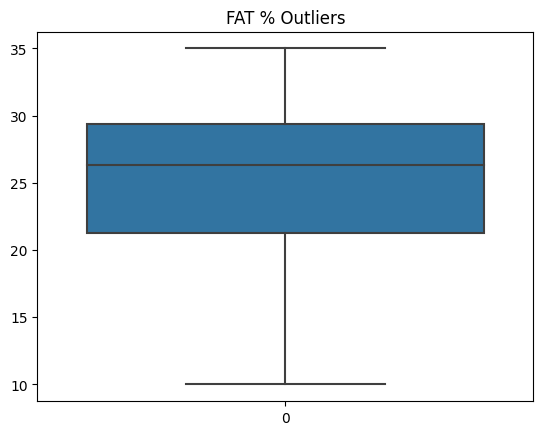

In [18]:
sns.boxplot(df['Fat_Percentage'])
plt.title("FAT % Outliers")

Text(0.5, 1.0, 'WATER INTAKE OUTLIERS')

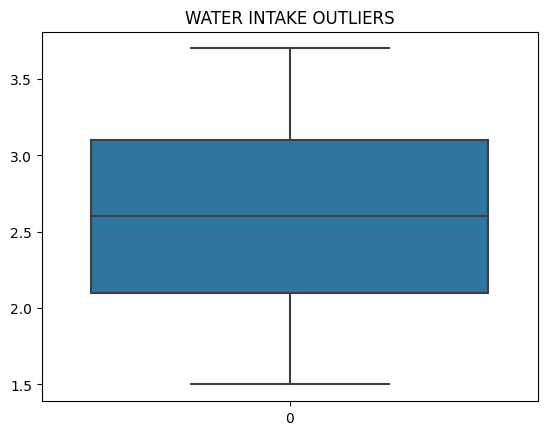

In [19]:
sns.boxplot(df['Water_Intake (liters)'])
plt.title("WATER INTAKE OUTLIERS")

<Axes: >

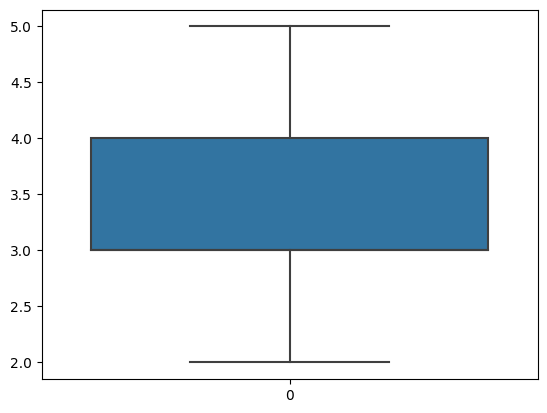

In [20]:
sns.boxplot(df['Workout_Frequency (days/week)'])

<Axes: >

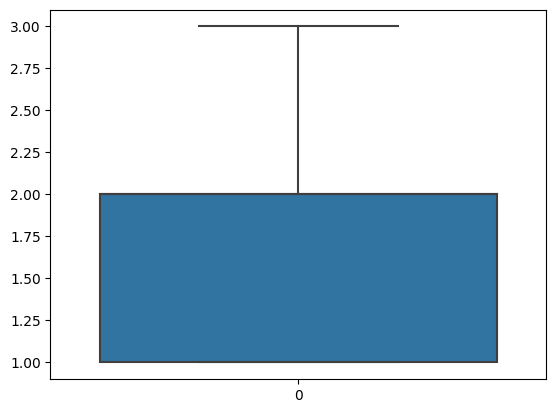

In [21]:
sns.boxplot(df['Experience_Level'])

<Axes: >

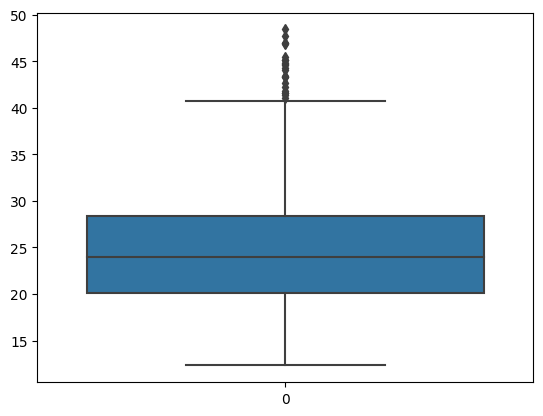

In [22]:
sns.boxplot(df['BMI'])

In [23]:
df=remove_outliers(df,'BMI')

## We have removed the outliers. Lets check the categorical columns

In [24]:
categorical = df.select_dtypes(include=['object'])

In [25]:
categorical

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength
...,...,...
968,Male,Strength
969,Male,Strength
970,Female,Cardio
971,Male,HIIT


In [26]:
categorical_columns=categorical.columns

## Lets check the correlation between values 

<Axes: >

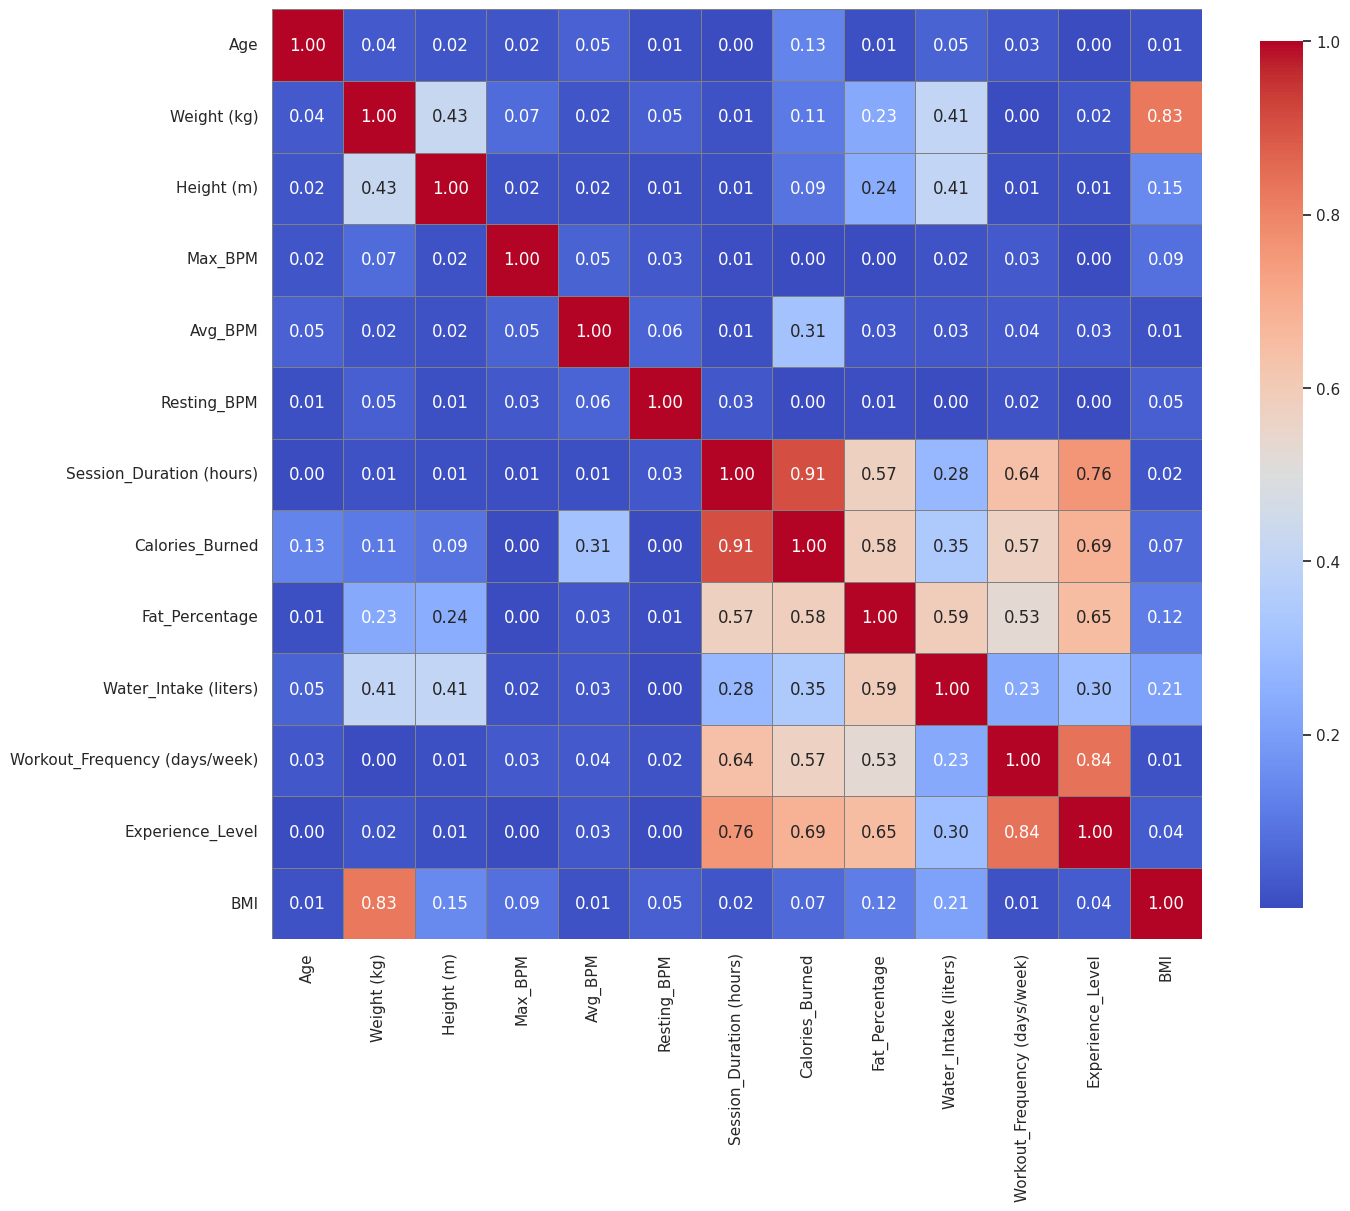

In [27]:
sns.set(style="white")  
numerical  =list( df.select_dtypes(include=['int64','float64']).columns)
plt.figure(figsize=(15,15))
sns.heatmap(df[numerical].corr().abs(),cmap="coolwarm",  # Use a color palette like 'coolwarm', 'viridis', etc.
                 annot=True,       # Annotate each cell with its value
                 fmt=".2f",        # Format annotations to 2 decimal places
                 linewidths=0.5,   # Add a slight grid between cells
                 linecolor='gray', # Color of grid lines
                 cbar_kws={'shrink': 0.75},  # Shrink the color bar
                 square=True)  

### Correlated Columns

- Weight is correlated with BMI
- Workout Frequency with Experience Level


In [28]:
# Drop correlated columns

df=df.drop(columns = ['Weight (kg)','Workout_Frequency (days/week)'],axis=1)

In [29]:
df

,Age,Gender,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI
0,56,Male,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,3,30.20
1,46,Female,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,2,32.00
2,32,Female,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,2,24.71
3,25,Male,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,1,18.41
4,38,Male,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,3,28.77
969,25,Male,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,1,25.69
970,59,Female,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,3,19.50
971,32,Male,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,2,37.74


## Define Target Variable

####  We will use the data to predict the **amount of Calories** a person can burn by working out, given his BMI, Gender, Duration,Workout TypeExperience Level. 

### Predictor Variable = Calories_Burned

In [30]:
# Data Standardization  and Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Calories_Burned'],axis=1),df['Calories_Burned'],test_size=0.25)

In [31]:
numerical = list(X_train.select_dtypes(include=['int64','float64']).columns)

In [32]:
transformer = ColumnTransformer(
[
    ("encode",OneHotEncoder(),list(categorical_columns)),
    ("standardize",StandardScaler(),numerical)
    
],remainder='passthrough'
)

In [33]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## We will use different models for finding the best fit with minimum Prediction Errors

In [34]:
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "lasso":Lasso(),
    "ridge":Ridge(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "Linear":LinearRegression(),
    "xgboost":XGBRegressor()
    
}

accuracies = []
from sklearn.metrics import r2_score

for name,model in models.items():
    model.fit(X_train_transformed,y_train)
    ypred = model.predict(X_test_transformed)
    accuracies.append({"Model":name,"R2 Score":r2_score(y_test,ypred)})
    
    

In [35]:
accuracies

[{'Model': 'lasso', 'R2 Score': 0.9769407255477861},
 {'Model': 'ridge', 'R2 Score': 0.9770864089039488},
 {'Model': 'DecisionTree', 'R2 Score': 0.9197703760732897},
 {'Model': 'RandomForest', 'R2 Score': 0.9669067011695219},
 {'Model': 'Linear', 'R2 Score': 0.977113100884085},
 {'Model': 'xgboost', 'R2 Score': 0.9764087492079789}]

In [36]:
models_df = pd.DataFrame(accuracies)

<Axes: xlabel='Model'>

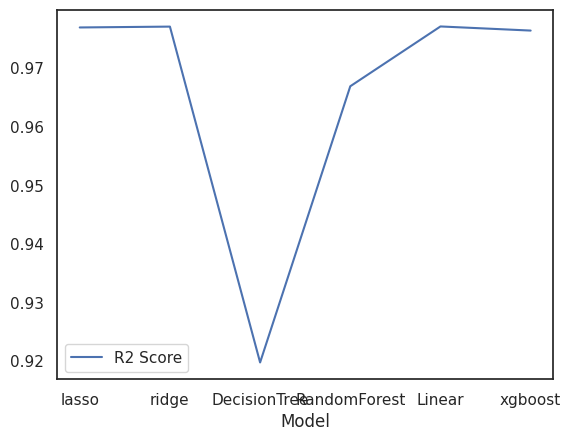

In [37]:
models_df.plot(x='Model')